In [2]:
import numpy as np 
import pandas as pd 


In [3]:
url1 = 'https://raw.githubusercontent.com/Eba-Fekadu/Machine_Learning_Capstone_Project_1/main/data/benin-malanville.csv'

df1 = pd.read_csv(url1)

# Quick preview of Benin data
print("Quick preview of Benin data\n", df1.head())

url2 = "https://raw.githubusercontent.com/Eba-Fekadu/Machine_Learning_Capstone_Project_1/main/data/sierraleone-bumbuna.csv"
df2 = pd.read_csv(url2)

# Quick preview of data

print("Quick preview of Sierra Leon data\n", df2.head())

url3 = "https://raw.githubusercontent.com/Eba-Fekadu/Machine_Learning_Capstone_Project_1/main/data/togo-dapaong_qc.csv"
df3 = pd.read_csv(url3)

# Quick preview of data

print("Quick preview of Togo dopaong data\n", df3.head())


Quick preview of Benin data
           Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4    

In [4]:
# summary statistics of df1 (Benin data)
print("Information of Benin data\n", df1.info())
print("Shape of Benin data\n", df1.shape)
# missing value of Benin data
print("Missing value of Benin data\n", df1.isnull().sum())
# data type of Benin data
print("Data type of Benin data\n", df1.dtypes)
# description of Benin data
print("Description of Benin data\n", df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
# summary statistics of df2 (Siera-leone data)
print("Information of Sierra Leon data\n", df2.info())
print("Shape of Sierra Leon data\n", df2.shape)
# missing value of Sierra Leon data
print("Missing value of Sierra Leon data\n", df2.isnull().sum())
# data type of Sierra Leon data
print("Data type of Sierra Leon data\n", df2.dtypes)
# description of Sierra Leon data
print("Description of Sierra Leon data\n", df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
# summary statistics of df3 (Togo data)
print("Information of Togo data\n", df3.info())
print("Shape of Togo data\n", df3.shape)
# missing value of Togo data
print("Missing value of Togo data\n", df3.isnull().sum())
# data type of Togo data
print("Data type of Togo data\n", df3.dtypes)
# description of Togo data
print("Description of Togo data\n", df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

### All three data sets have equal number of features and rows. To work as a group , we will join the three datasets into one dataset.

In [7]:
# Combine the three datasets into one dataset
df = pd.concat([df1, df2, df3], ignore_index=True)
print("Combined dataset shape:", df.shape)
print(df.head())

Combined dataset shape: (1576800, 19)
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       Na

In [8]:
# Shape of the combined dataset
print("Shape of the combined dataset\n", df.shape)
# Information of the combined dataset
print("Information of the combined dataset\n", df.info())
# description of the combined dataset
print("Description of the combined dataset\n", df.describe().T)

Shape of the combined dataset
 (1576800, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576800 entries, 0 to 1576799
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1576800 non-null  object 
 1   GHI            1576800 non-null  float64
 2   DNI            1576800 non-null  float64
 3   DHI            1576800 non-null  float64
 4   ModA           1576800 non-null  float64
 5   ModB           1576800 non-null  float64
 6   Tamb           1576800 non-null  float64
 7   RH             1576800 non-null  float64
 8   WS             1576800 non-null  float64
 9   WSgust         1576800 non-null  float64
 10  WSstdev        1576800 non-null  float64
 11  WD             1576800 non-null  float64
 12  WDstdev        1576800 non-null  float64
 13  BP             1576800 non-null  int64  
 14  Cleaning       1576800 non-null  int64  
 15  Precipitation  1576800 non-null  float64
 16  TModA    

Outlier detection using Isolation forest

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df['Timestamp'].dtype)

datetime64[ns]


In [10]:
df_daily = df.set_index('Timestamp').resample('D')['GHI'].mean().reset_index()
print("Daily mean GHI data:", df_daily.head())

Daily mean GHI data:    Timestamp         GHI
0 2021-08-09  236.276859
1 2021-08-10  216.653958
2 2021-08-11   98.108958
3 2021-08-12  210.430972
4 2021-08-13  121.741667


In [ ]:
df_monthly = df.set_index('Timestamp').resample('M')['GHI'].mean().reset_index()
print("Monthly mean GHI data:", df_monthly.head())

In [12]:
df_monthly = df.set_index('Timestamp').resample('ME')['GHI'].mean().reset_index()
print("Monthly mean GHI data:", df_monthly.head())

Monthly mean GHI data:    Timestamp         GHI
0 2021-08-31  198.051025
1 2021-09-30  222.887431
2 2021-10-31  257.026885
3 2021-11-30  237.873235
4 2021-12-31  219.328174


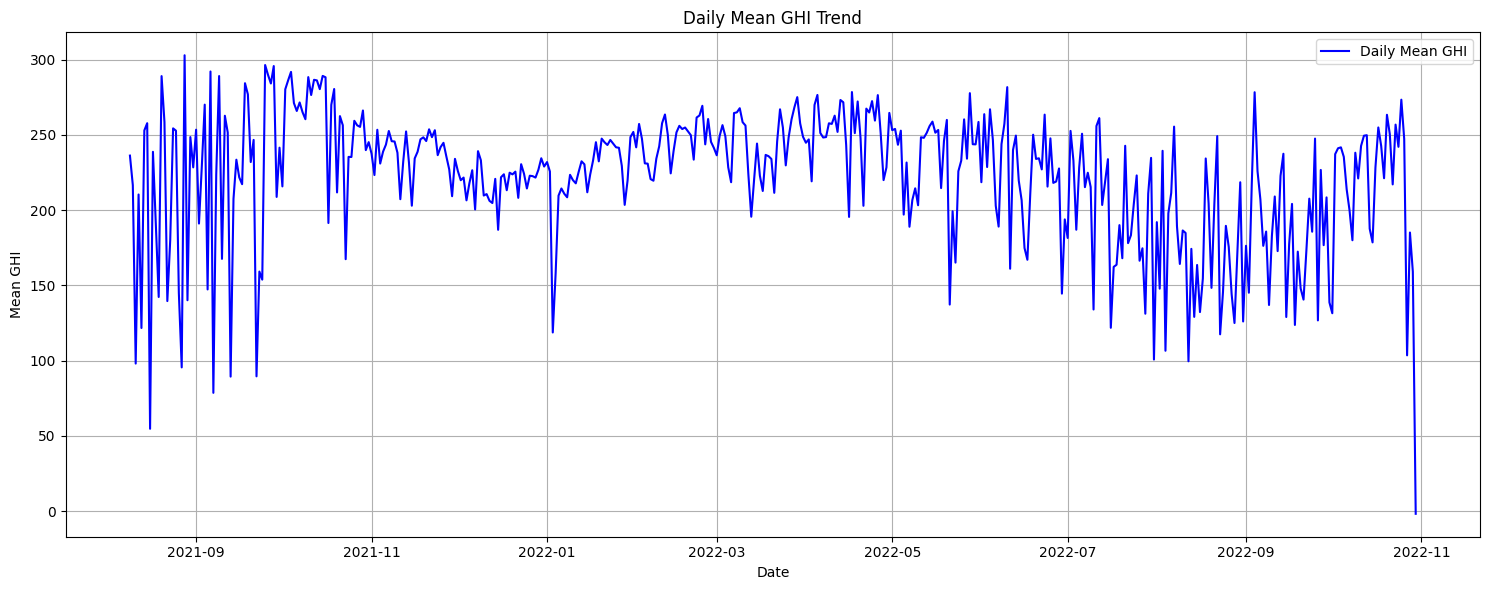

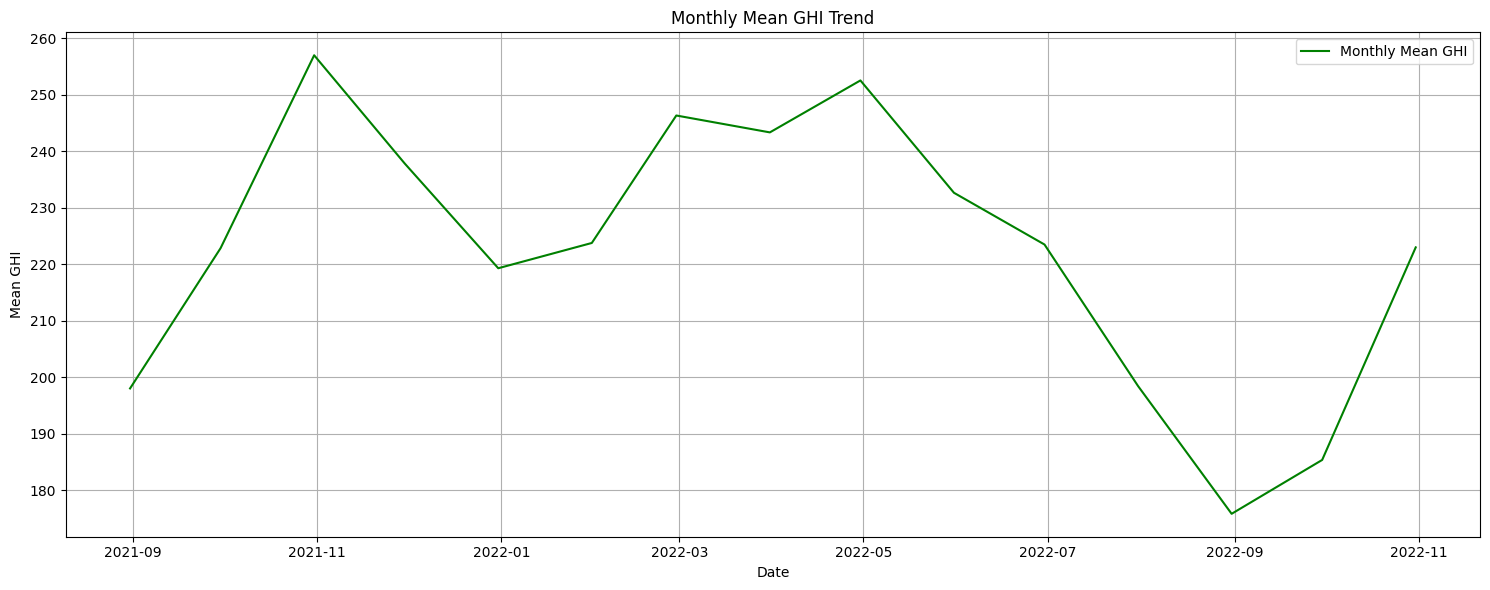

In [13]:
import matplotlib.pyplot as plt

# Plot daily mean GHI
plt.figure(figsize=(15, 6))
plt.plot(df_daily['Timestamp'], df_daily['GHI'], label='Daily Mean GHI', color='blue')
plt.title('Daily Mean GHI Trend')
plt.xlabel('Date')
plt.ylabel('Mean GHI')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot monthly mean GHI
plt.figure(figsize=(15, 6))
plt.plot(df_monthly['Timestamp'], df_monthly['GHI'], label='Monthly Mean GHI', color='green')
plt.title('Monthly Mean GHI Trend')
plt.xlabel('Date')
plt.ylabel('Mean GHI')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()